**Wine Quality Prediction ModeL**

**Name:** Ansmary Kurian

**Organization:** Entri Elevate

**Date:** 31/01/2025


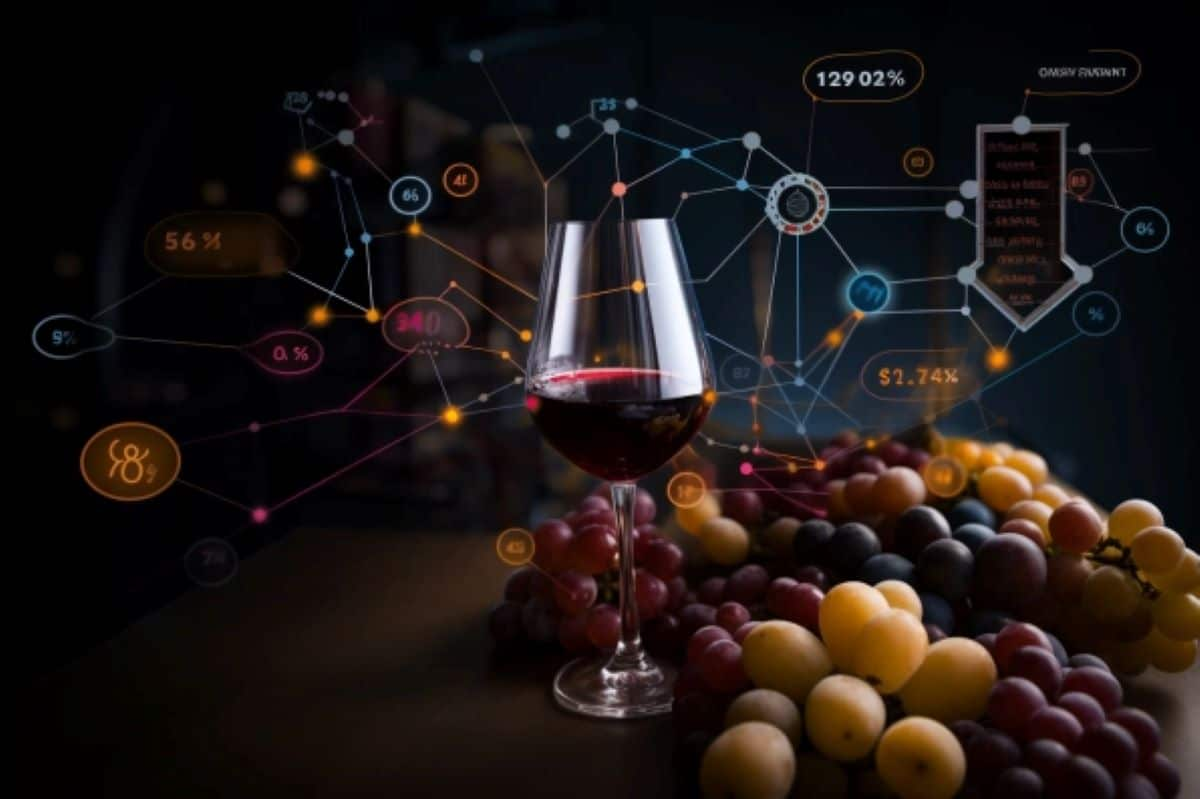


**Overview of Problem Statement:**

The wine industry is a multibillion-dollar market, with quality assessment and classification of paramount importance in establishing the price, consumer preference, and ultimately market success. Historically, wine quality is rated by human experts by using sensory analysis. Even though this is of significant value, it remains subjective in nature, very time-consuming, and also very expensive. This necessitates an objective, consistent, and efficient method of predicting the quality and characteristics of wine.This method would bring consistency, transparency, and scalability to the evaluation of wines, therefore helping producers, sellers, and consumers alike.

**Objective:**
Eg: To develop the best Wine quality prediction model using machine learning techniques.

**Data Description:**
- Source: From UCI:- https://archive.ics.uci.edu/dataset/186/wine+quality
- Features:
fixed_acidity,
volatile_acidity,
citric_acid,
residual_sugar,
chlorides,
free_sulfur_dioxide,
total_sulfur_dioxide,
density,
pH,
sulphates,
alcohol,
quality,
Wine_type(red or white after combaining both changed to 0 as white and 1 as red )



Loading Libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel, RFE, SelectKBest, chi2

**Data Collection**

In [59]:
white_wine=pd.read_csv('winequality-white.csv',sep=';')
red_wine=pd.read_csv('winequality-red.csv',sep=';')

In [60]:
white_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [61]:
white_wine['wine_type']='white'
red_wine['wine_type']='red'

Combaining Both Dataset

In [63]:
Combained = pd.concat([white_wine, red_wine], ignore_index=True)

In [64]:
Combained.shape

(6497, 13)

In [65]:
Combained.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality wine_type  
0      8.8        6     white  
1      9.5        6     white  
2     10.1        6     white  
3      9.9        6     white  
4      9.9        6     white

In [66]:
#Changing to WineType values 1 and 0
Combained['wine_type']=Combained['wine_type'].replace({'white':0,'red':1})

C:\Users\DELL\AppData\Local\Temp\ipykernel_10488\3414185296.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Combained['wine_type']=Combained['wine_type'].replace({'white':0,'red':1})


In [67]:
# saved this combained dataset for later use
csv_file_path = 'winequality_Combained.csv'
Combained.to_csv(csv_file_path, index=False)

In [68]:
Combained.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  wine_type  
0      8.8        6          0  
1      9.5        6          0  
2     10.1        6          0  
3      9.9        6          0  
4      9.9        6          0

In [69]:
Combained.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [70]:
Combained.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality    wine_type  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378     0.246114  
std       0.160787     0.148806     1.192712     0.873255     0.430779  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     0.000000  
50%       3.210000     0.510000    10.300000     6.000000     0.000000  
75%       3.320000     0.600000    11.300000     6.000000     0.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

**Data Cleaning and Preprocesing**

In [72]:
Combained.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

In [73]:
Combained.duplicated().sum()

1177

In [74]:
Combained.drop_duplicates(inplace=True)
Combained.duplicated().sum()

0

In [75]:
Combained.shape

(5320, 13)

Checking Outliers , removing and normalize the datas


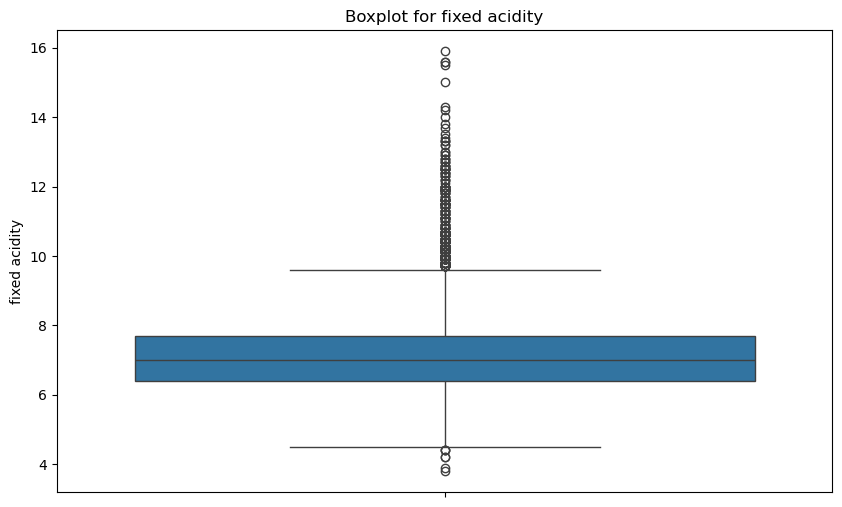

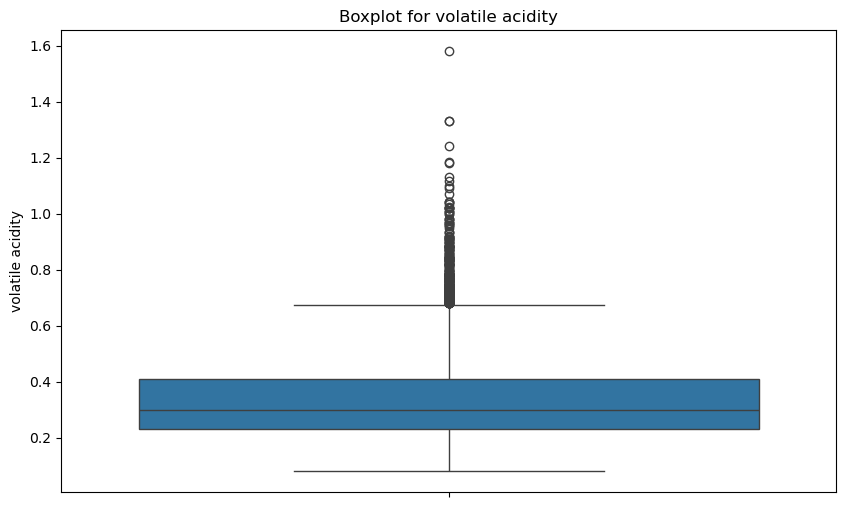

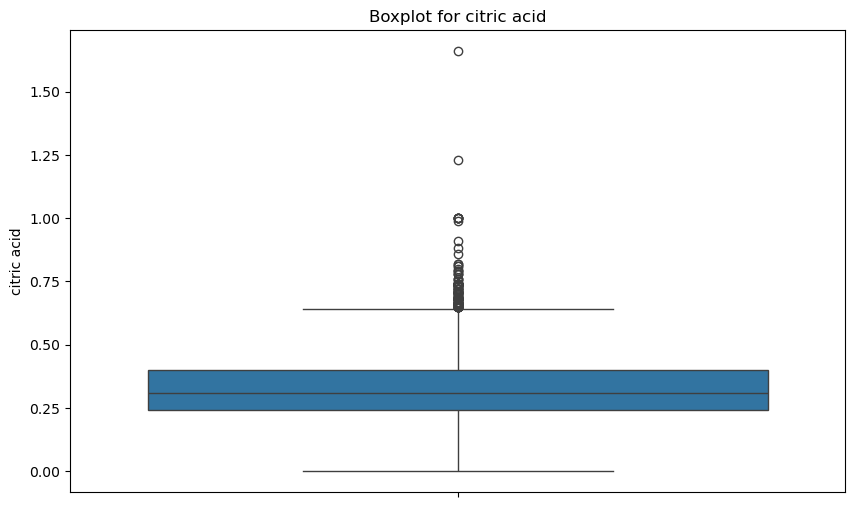

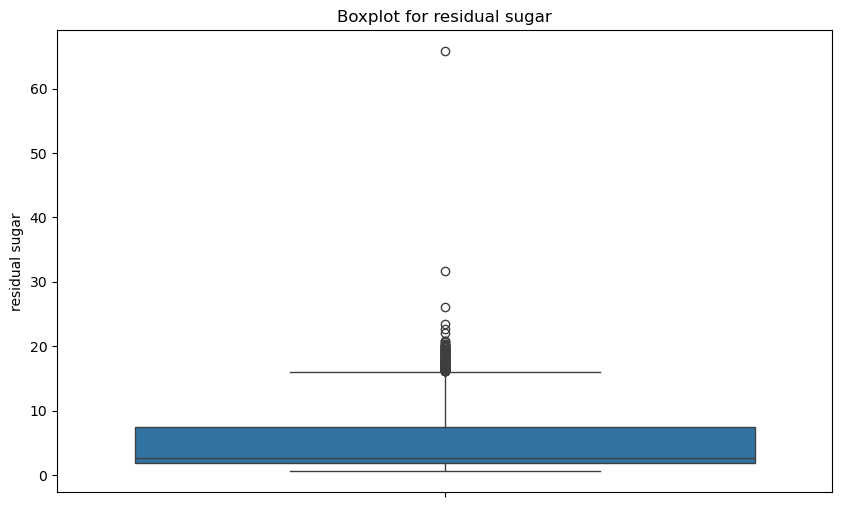

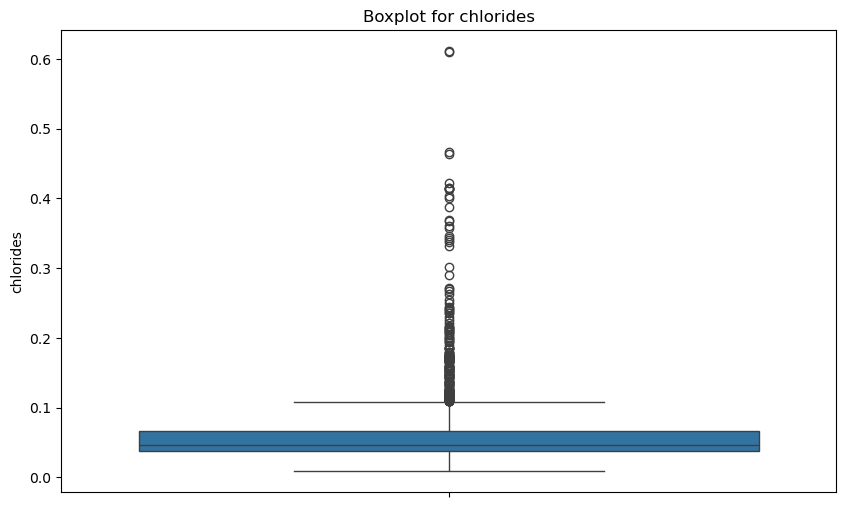

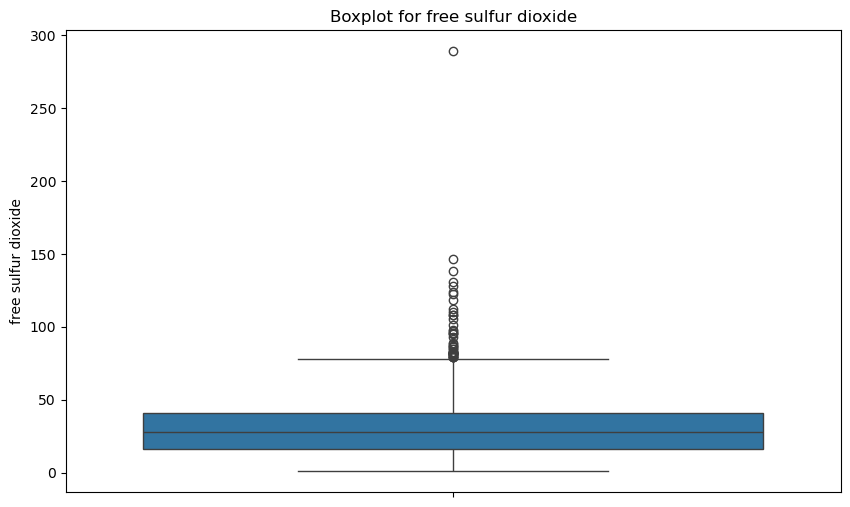

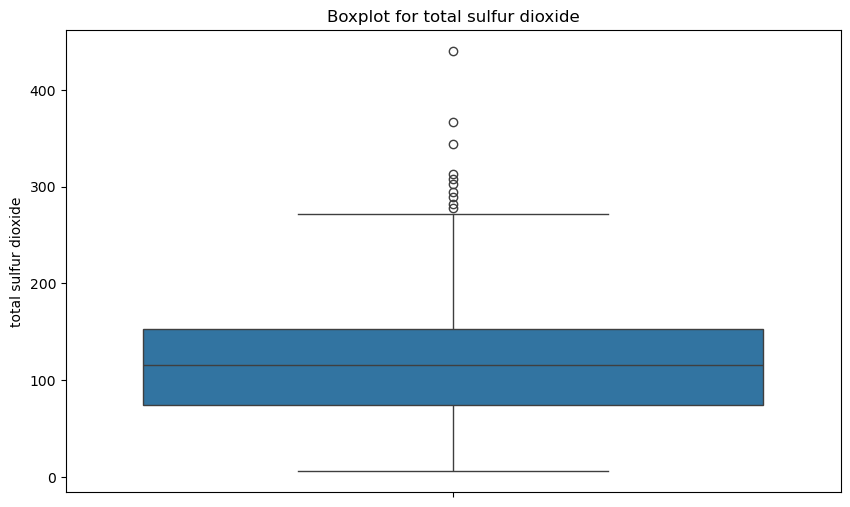

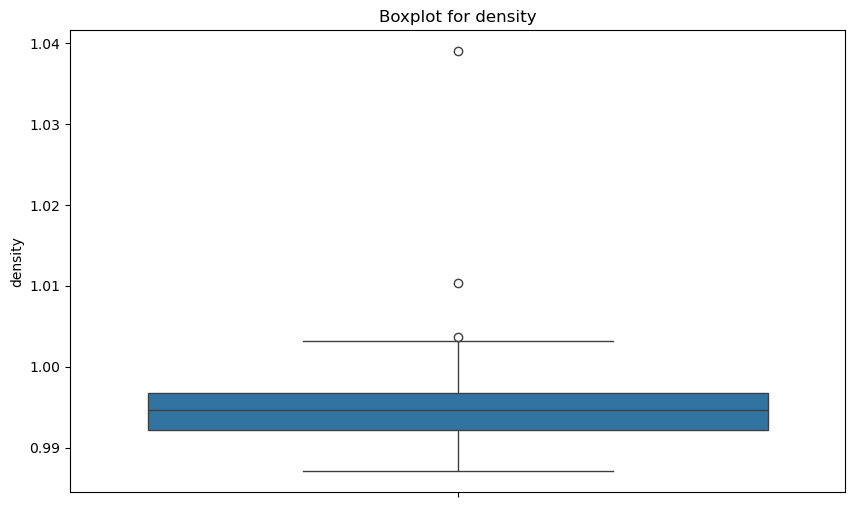

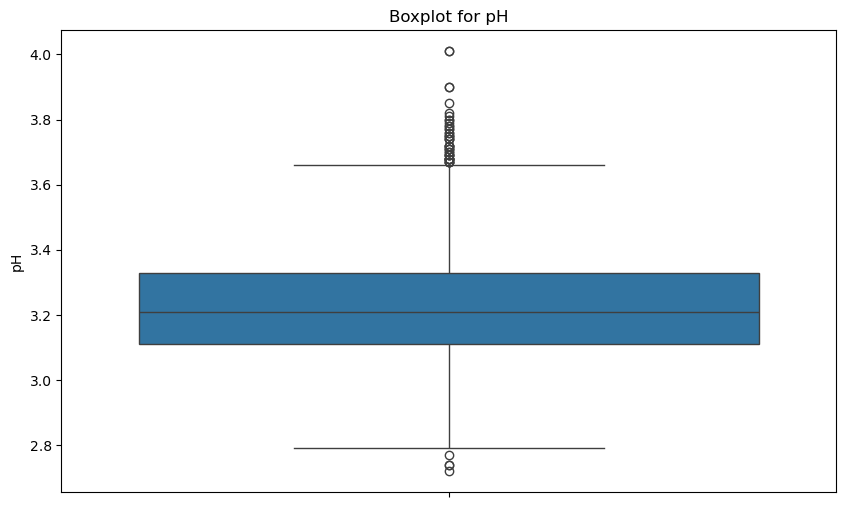

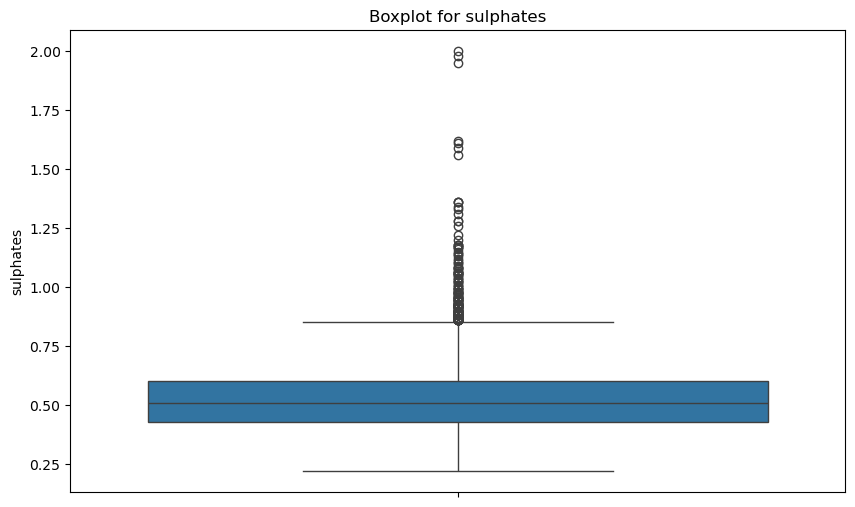

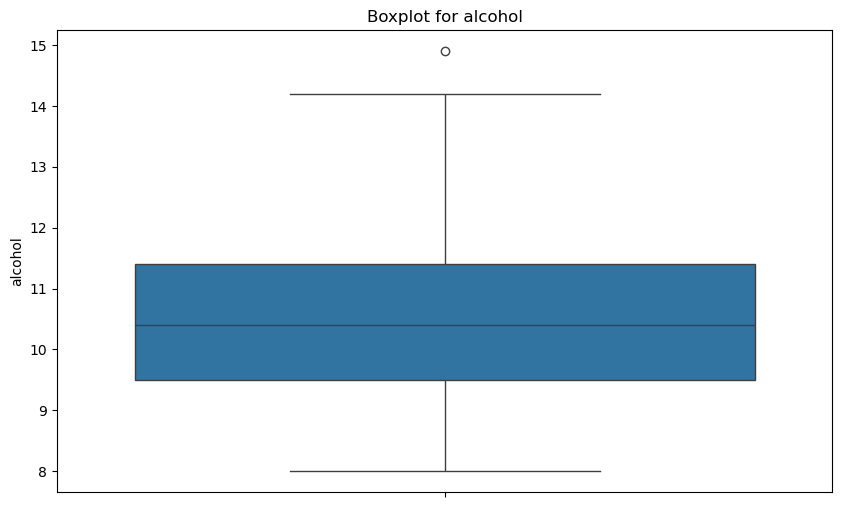

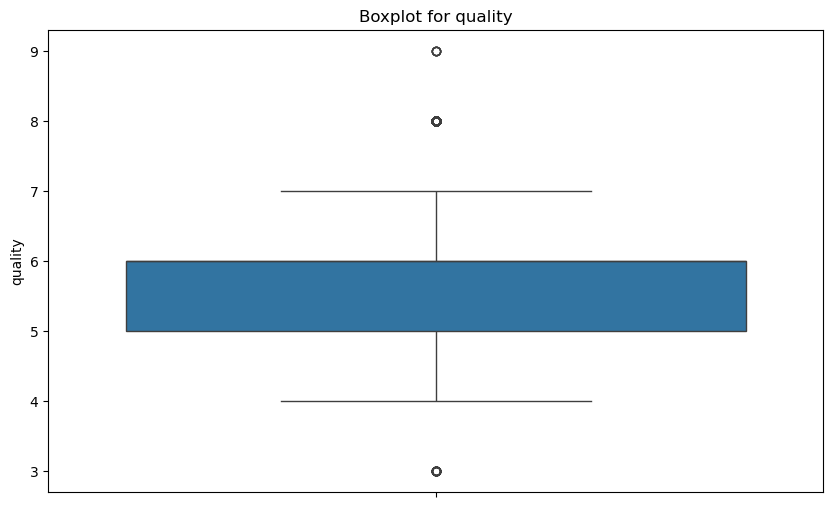

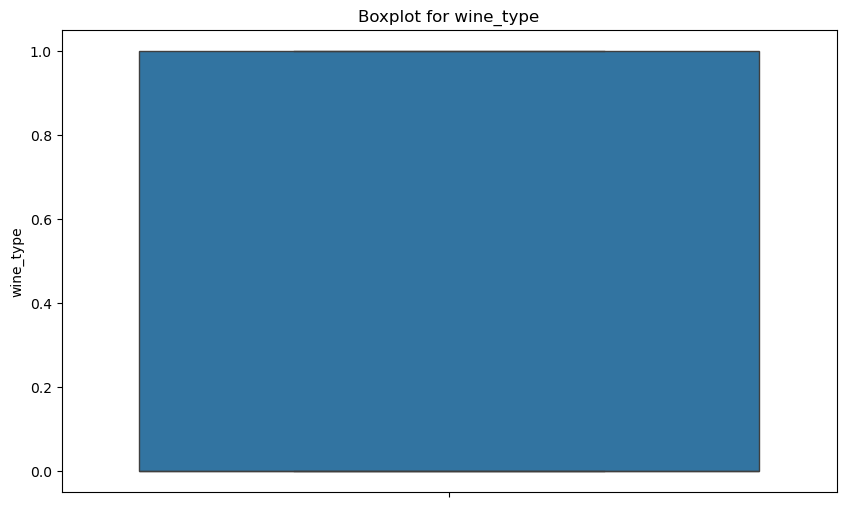

In [77]:
# Box plot to find the outliers
for col in Combained.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(Combained[col])
  plt.title(f'Boxplot for {col}')
  plt.show()

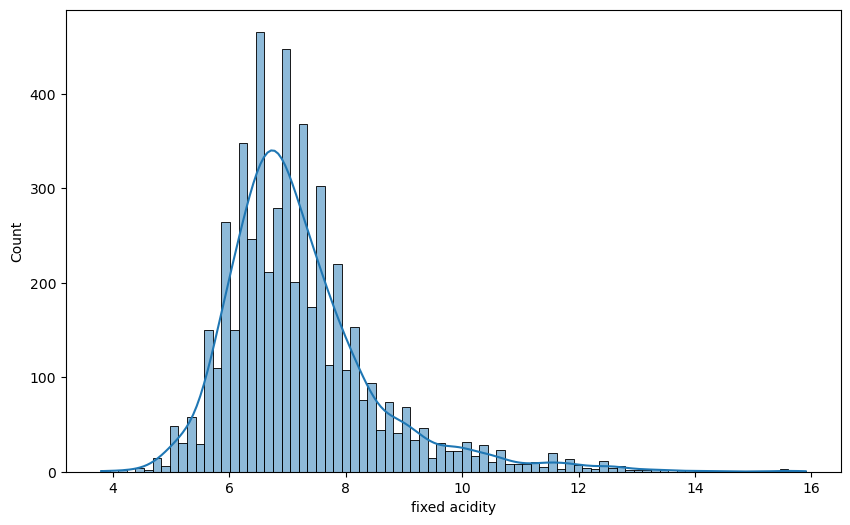

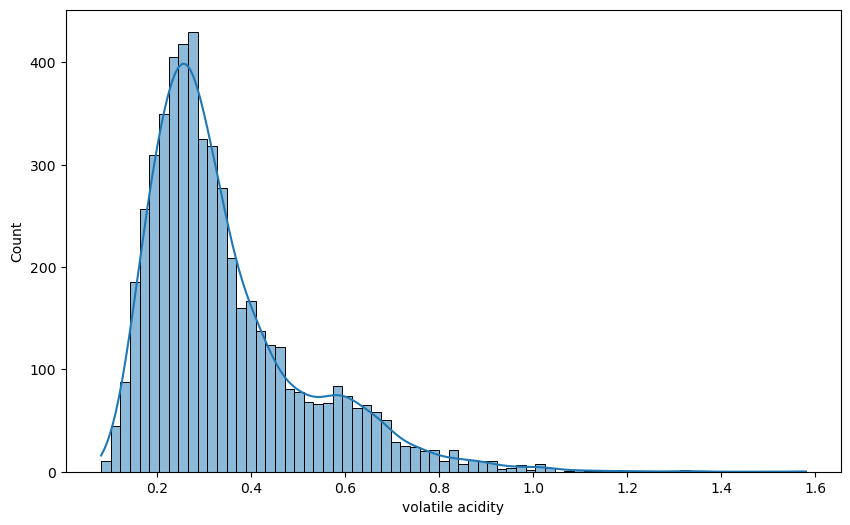

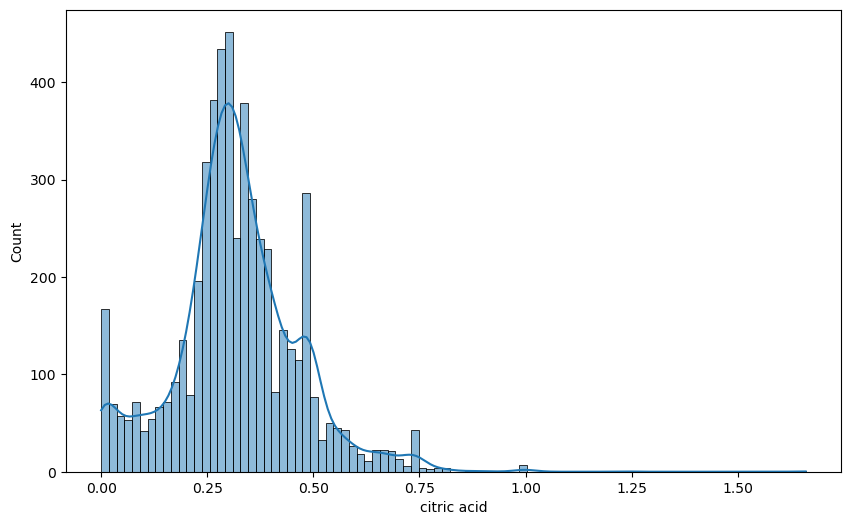

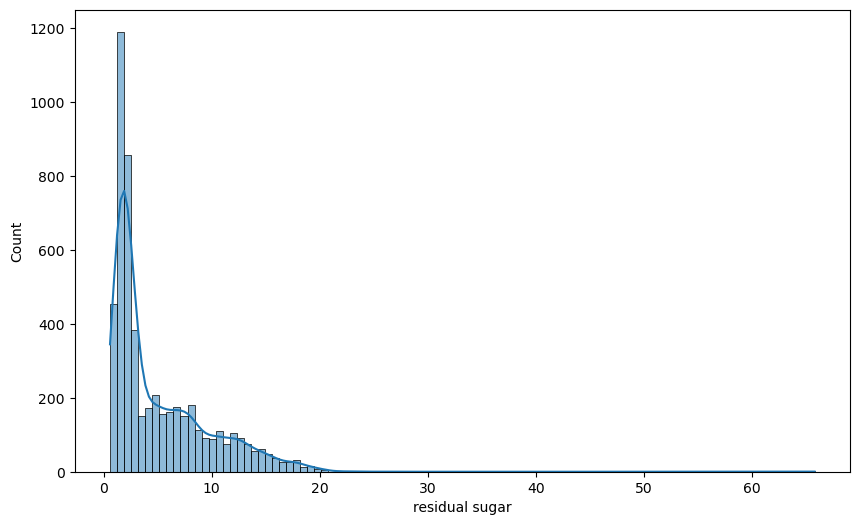

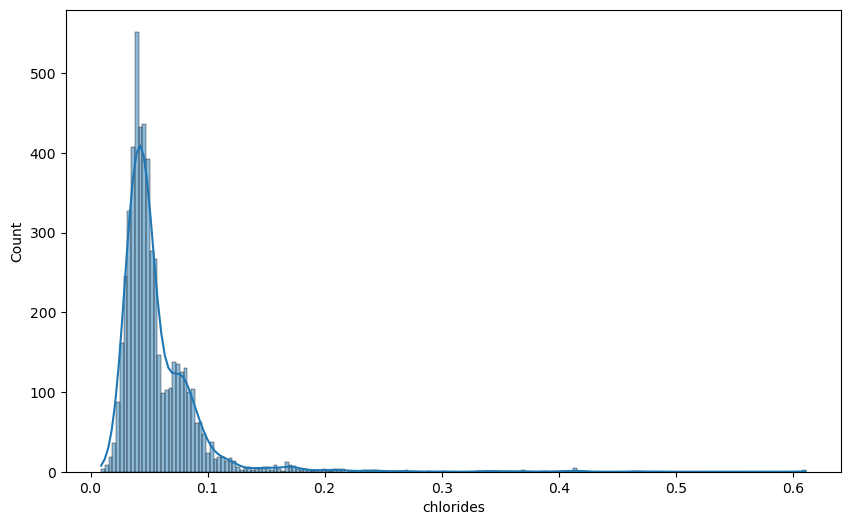

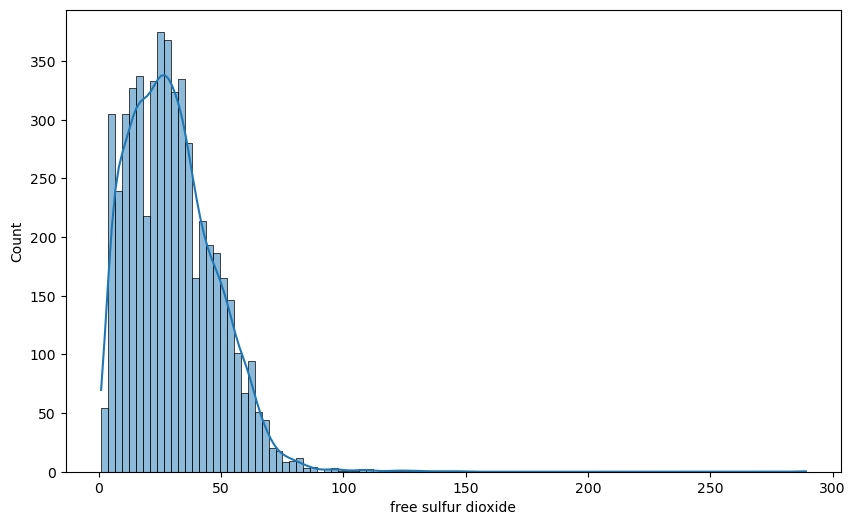

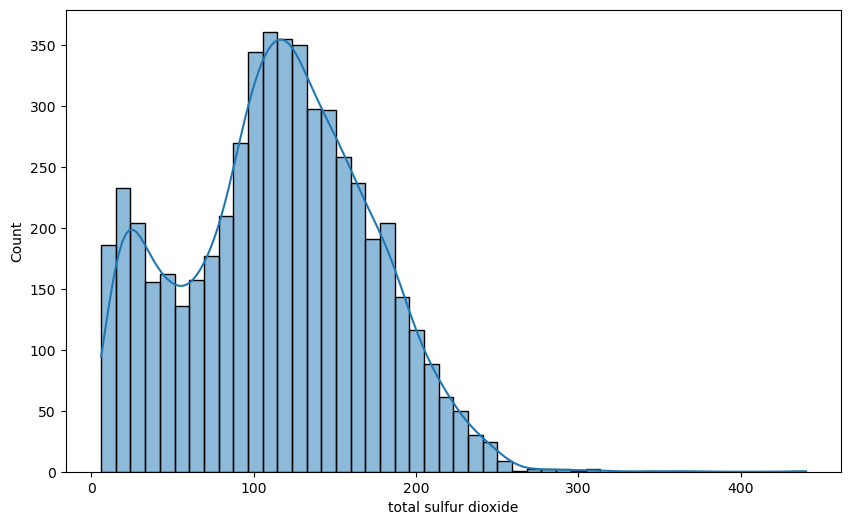

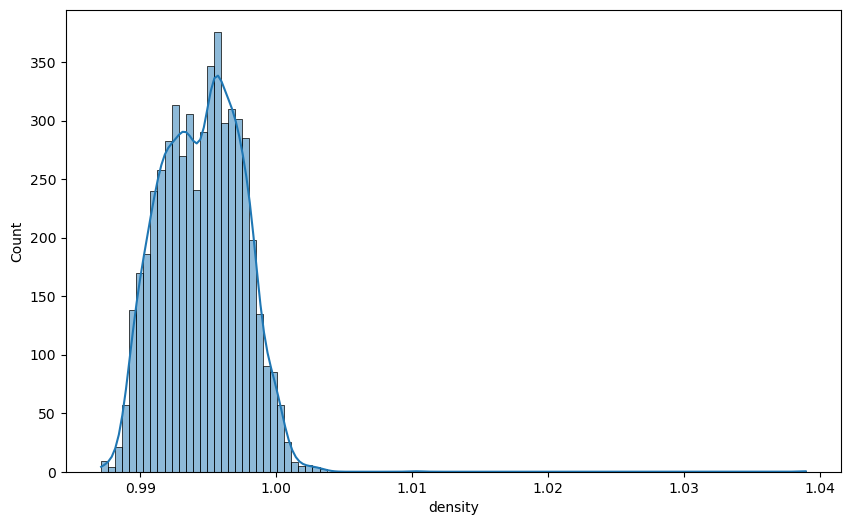

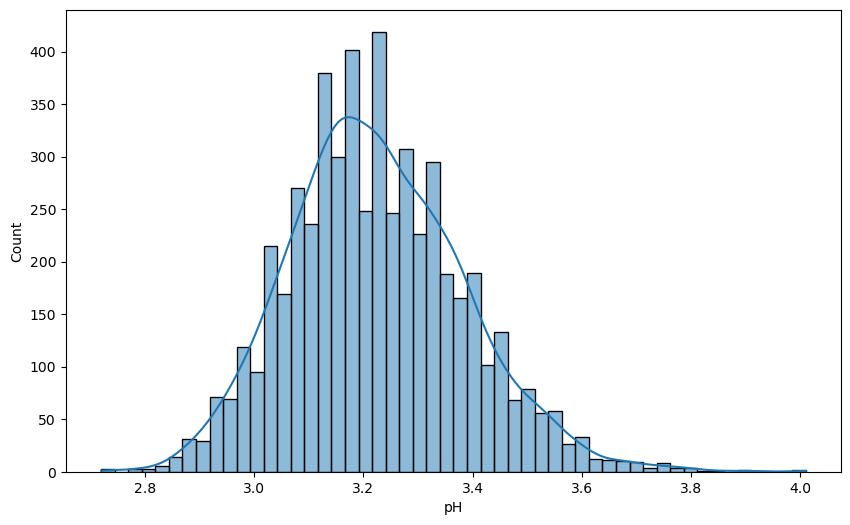

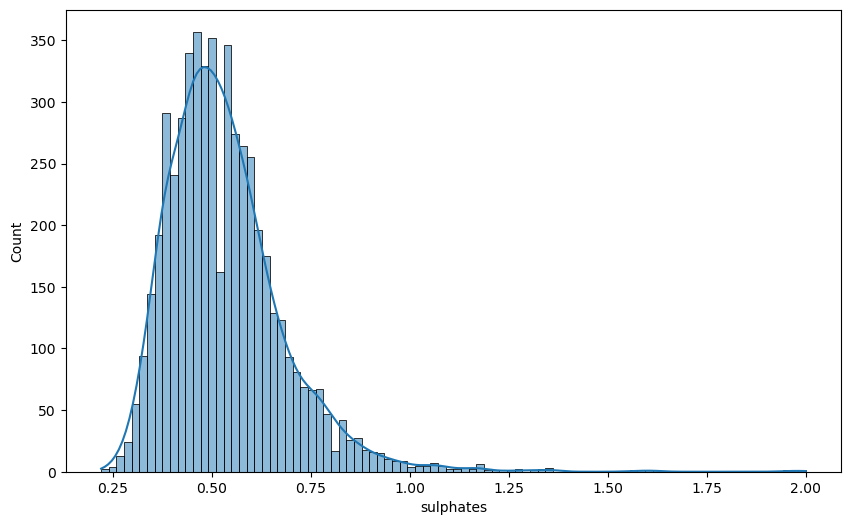

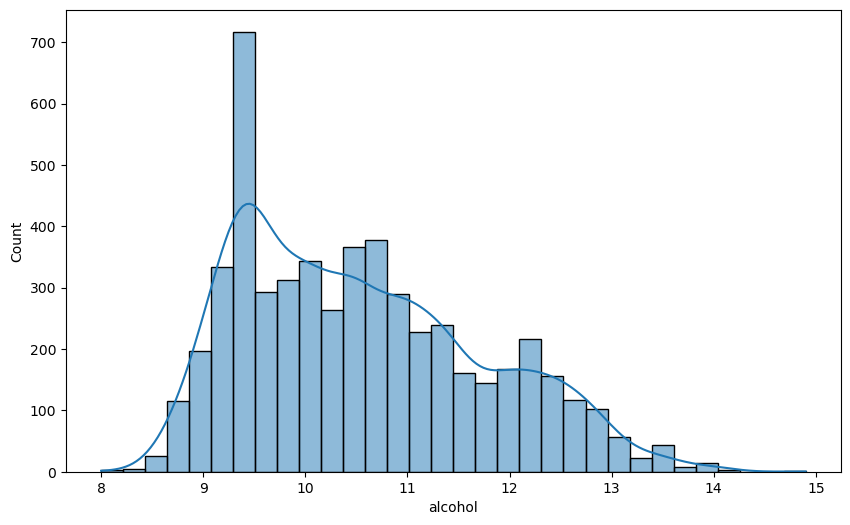

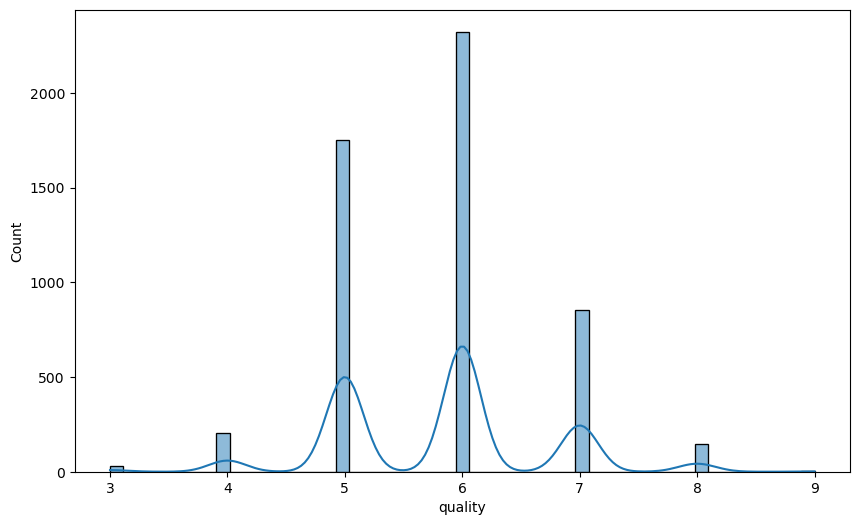

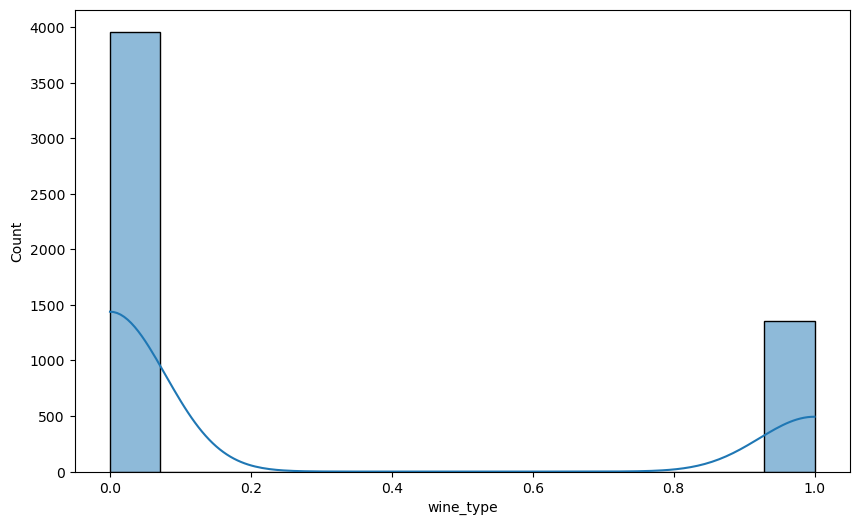

In [78]:
for col in Combained.columns:
  plt.figure(figsize=(10,6))
  sns.histplot(Combained[col],kde=True)
  plt.show()

In [79]:
# Outlier function
def handle_outliers(df):
  for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column]=np.where((df[column]<lower_bound) | (df[column]>upper_bound),df[column].median(),df[column])

  return df

In [80]:
#Handling the outliers
Combained= handle_outliers(Combained)
Combained.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36             2.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
6            6.2              0.32         0.16             7.0      0.045   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
6                 30.0                 136.0   0.9949  3.18       0.47   

   alcohol  quality  wine_type  
0      8.8      6.0        0.0  
1      9.5      6.0        0.0  
2     10.1      6.0        0.0  
3      9.9      6.0        0.0  
6      9.6      6.0        0.0

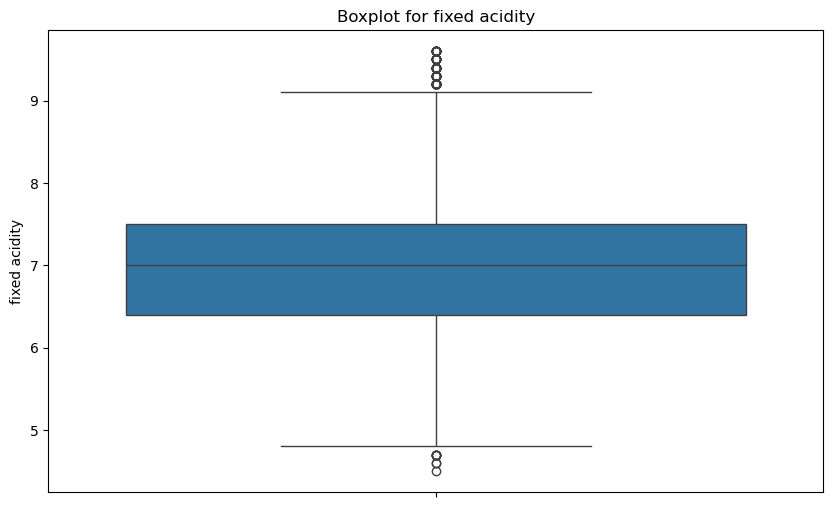

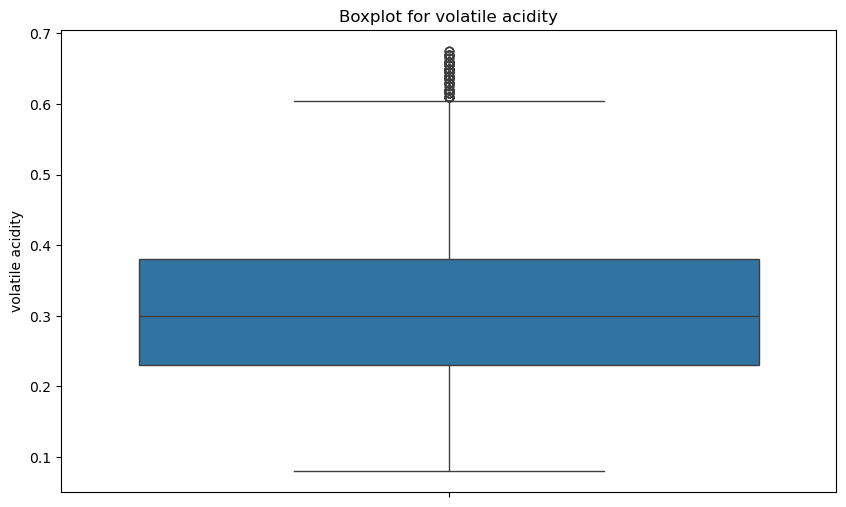

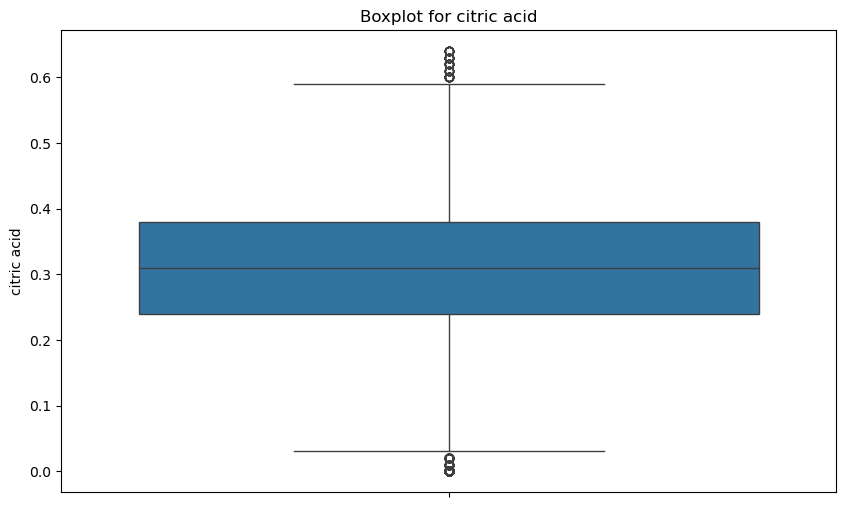

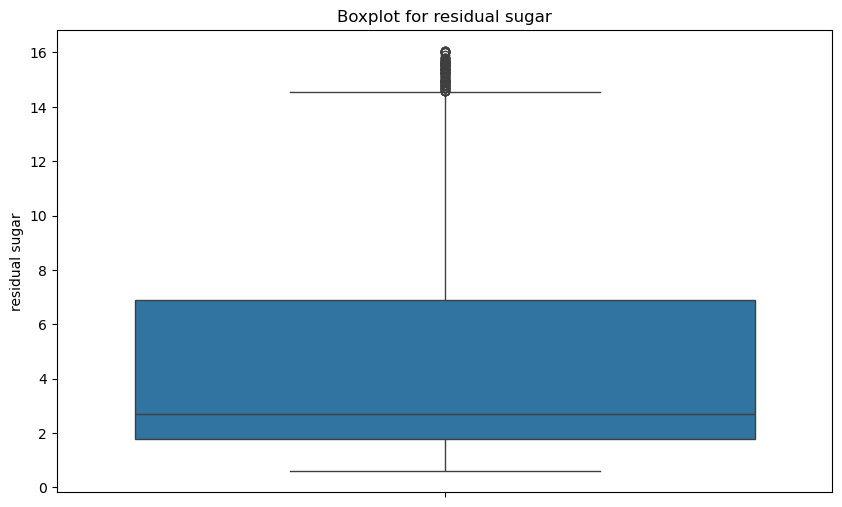

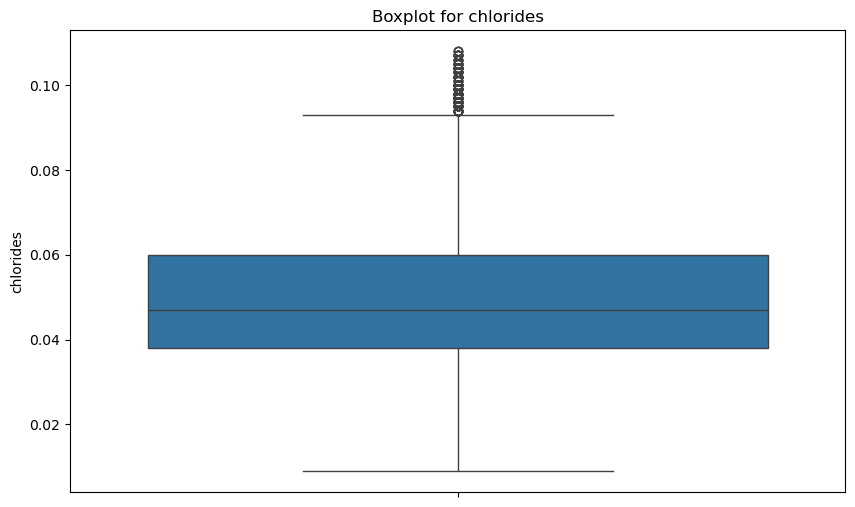

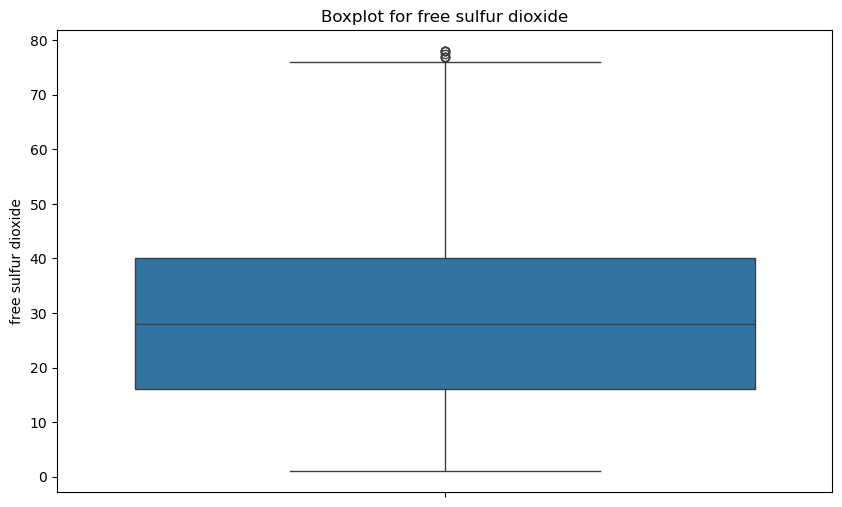

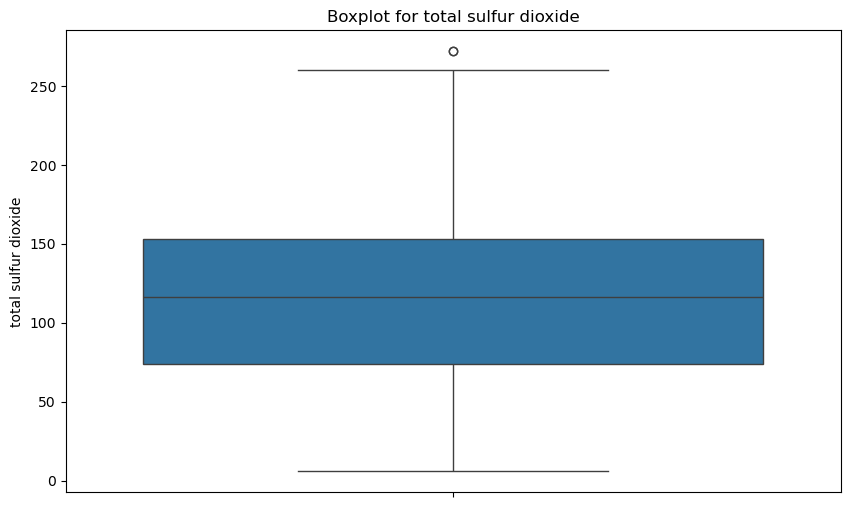

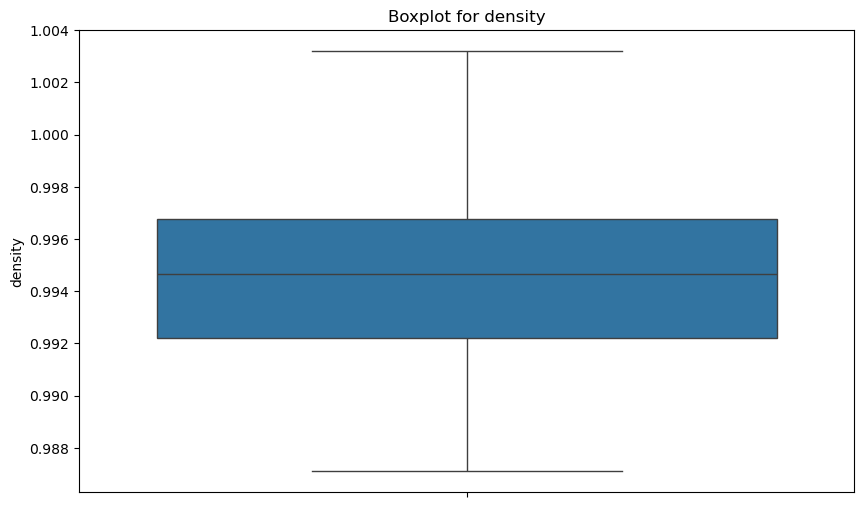

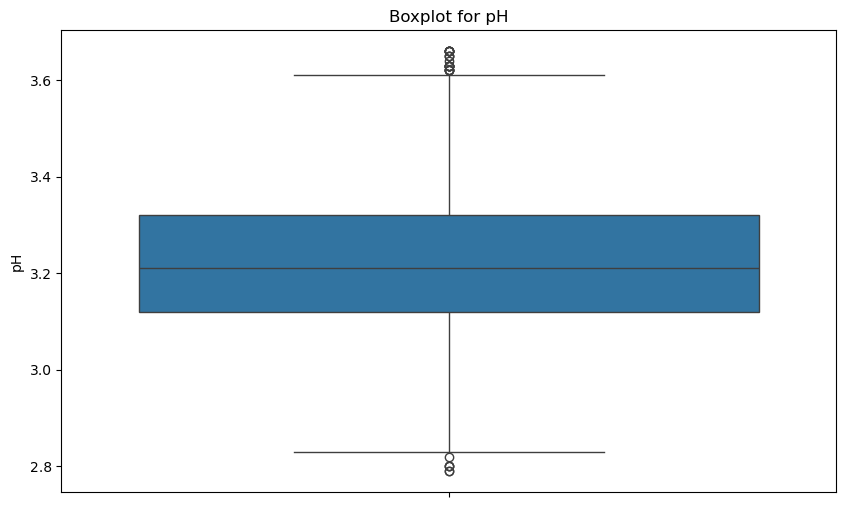

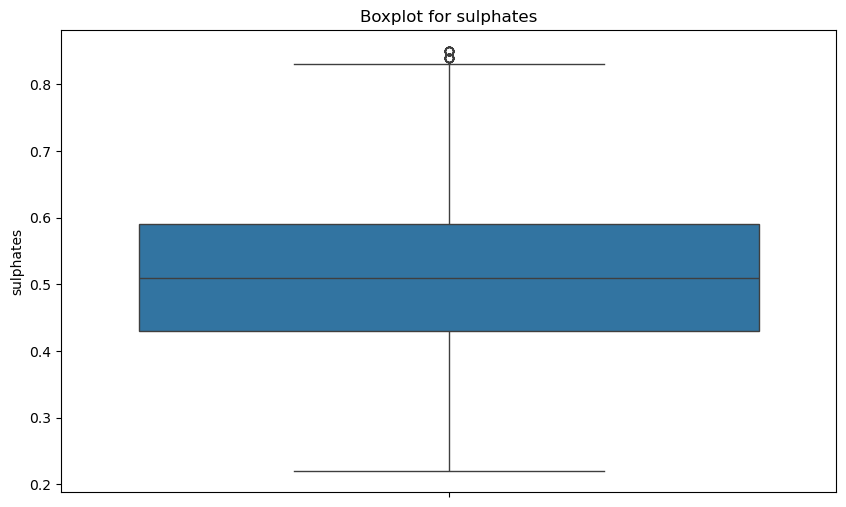

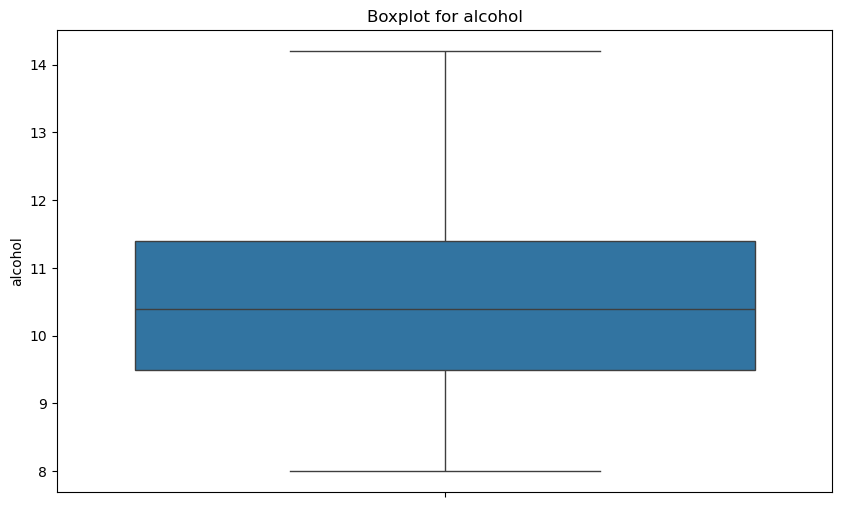

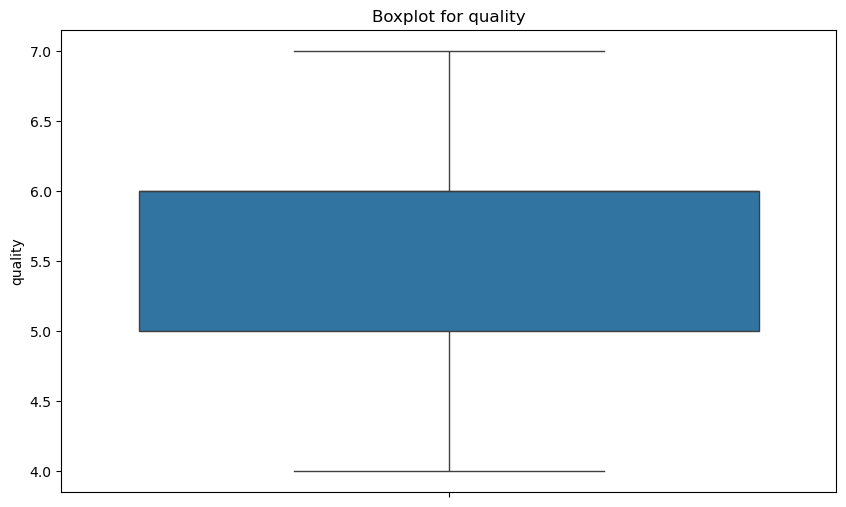

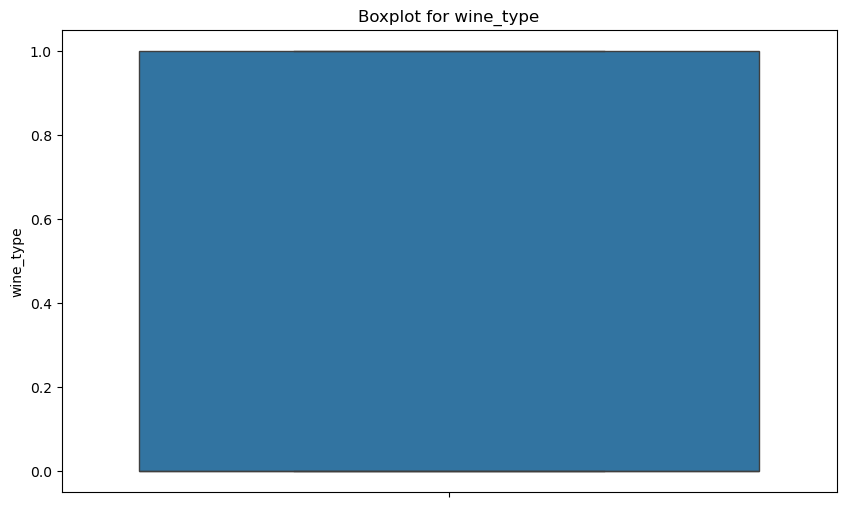

In [81]:
# after removing outliers
for col in Combained.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(Combained[col])
  plt.title(f'Boxplot for {col}')
  plt.show()

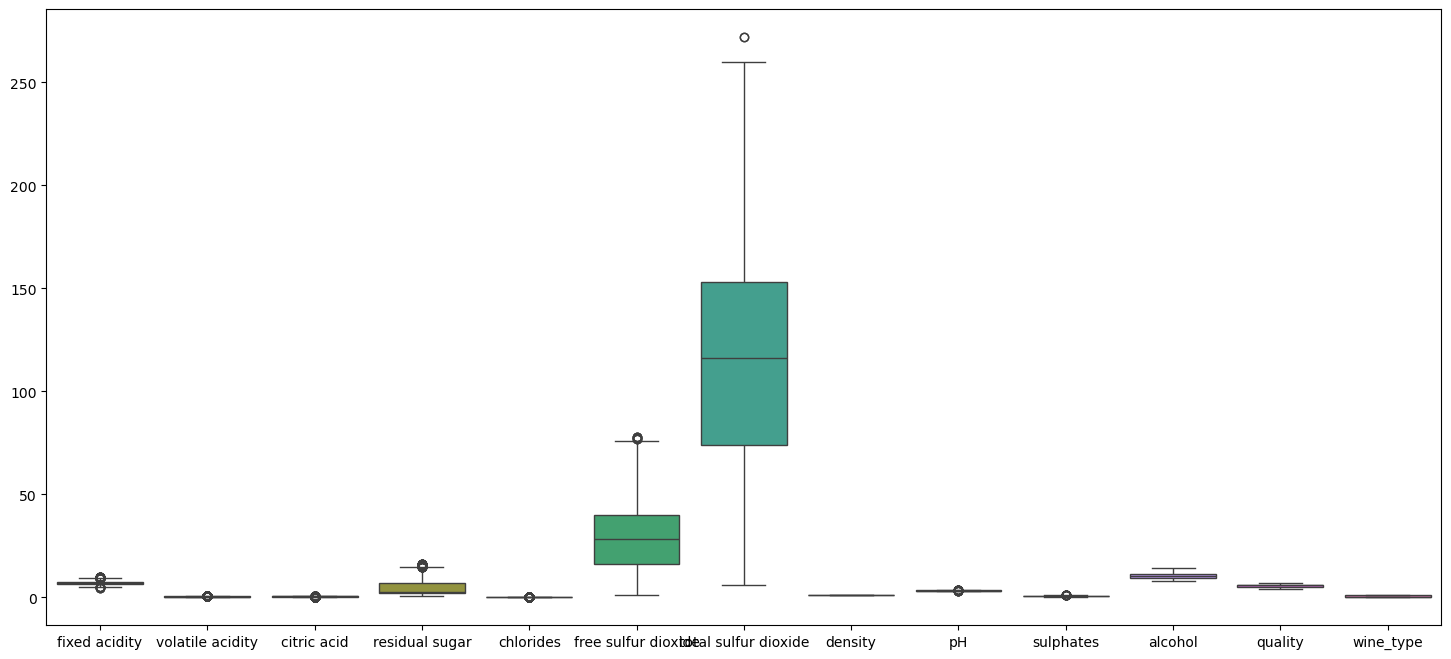

In [82]:
plt.figure(figsize=(18,8))
sns.boxplot(data=Combained)
plt.show()

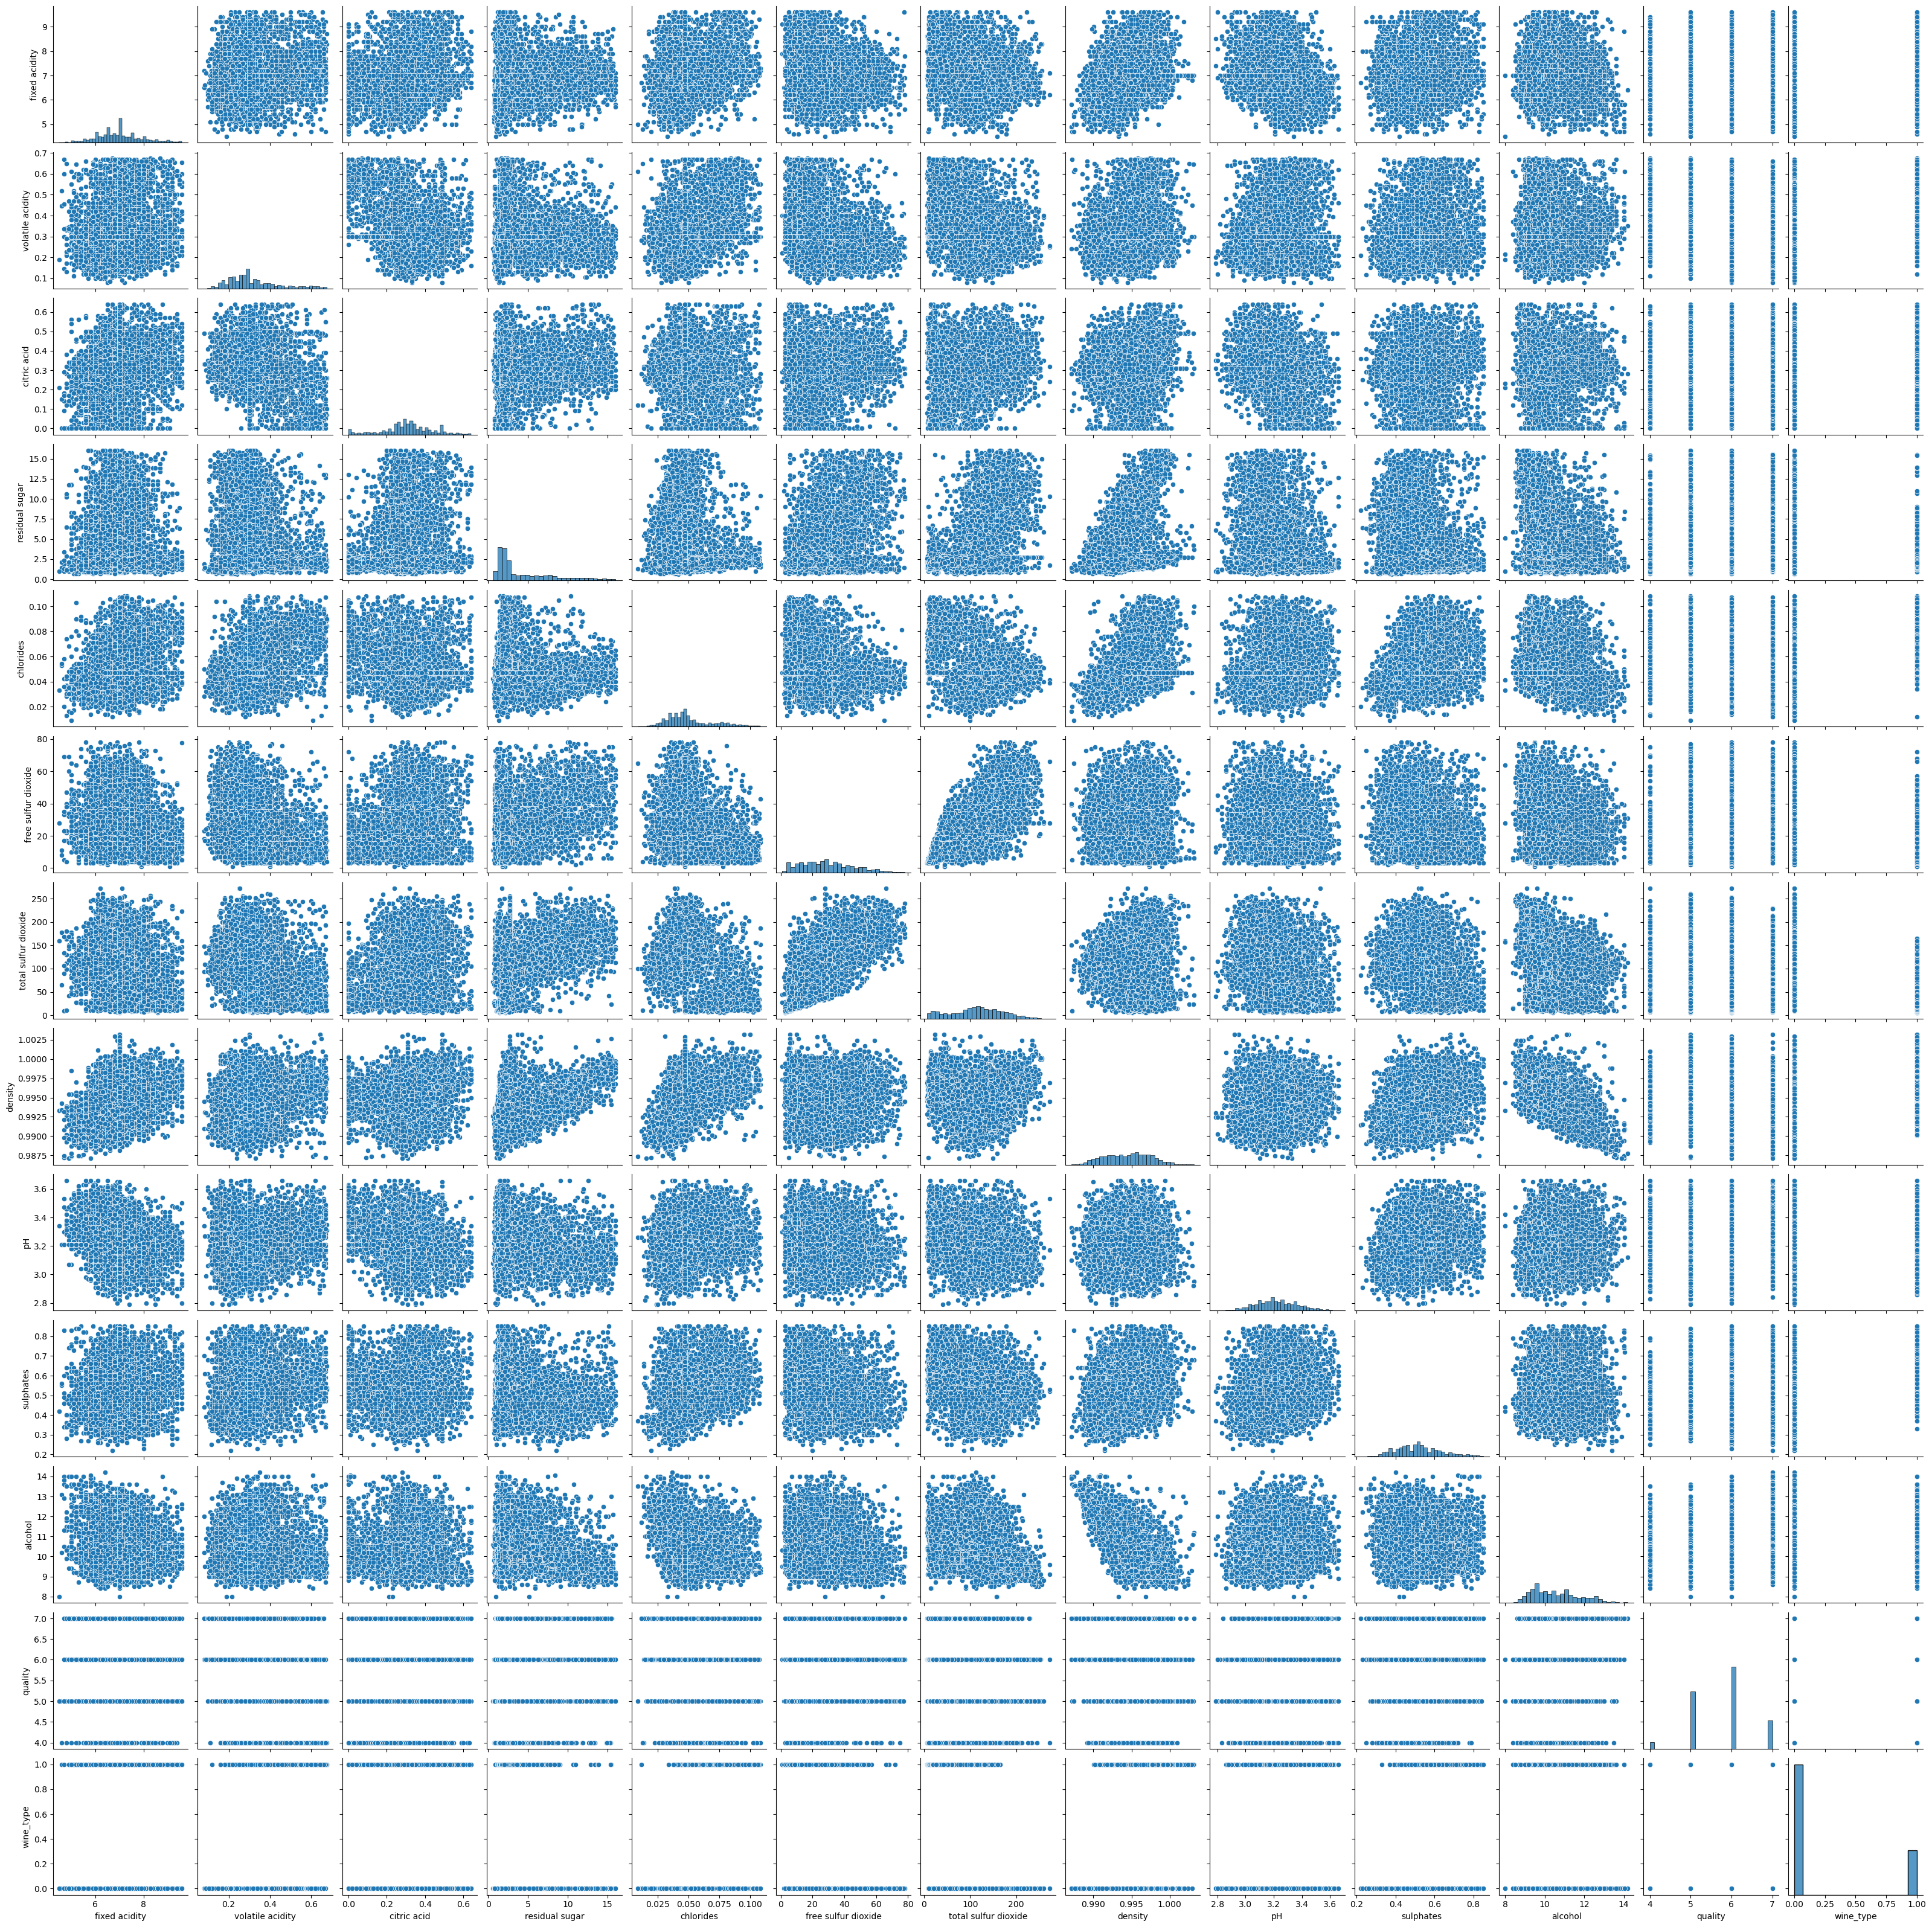

In [83]:
sns.pairplot(Combained)
plt.show() # find out there is no relation between each features all are scattered

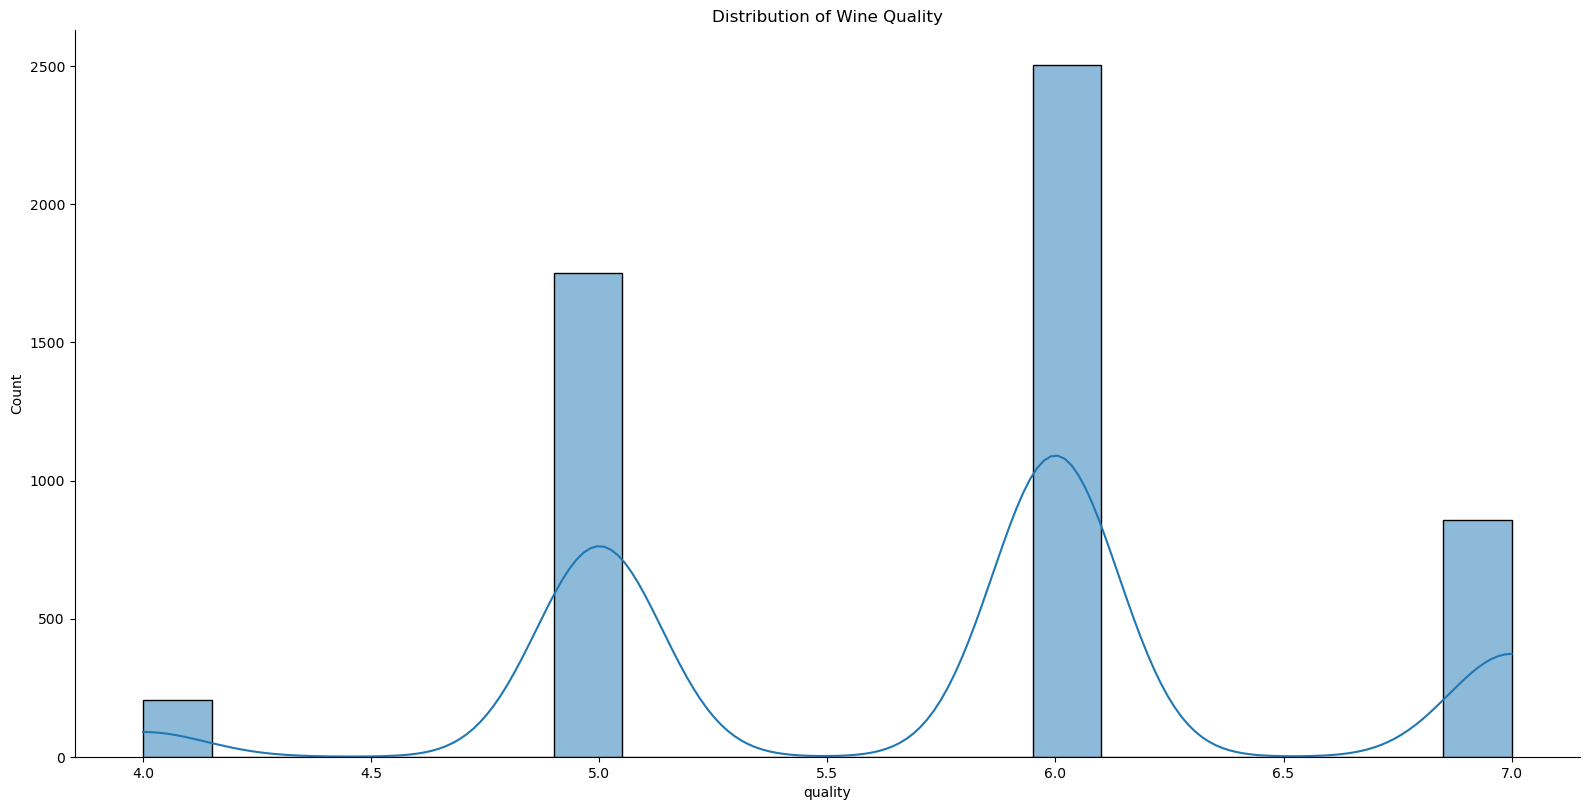

In [84]:
sns.displot(Combained['quality'],bins=20,kde=True,height=8,aspect=2)
plt.title('Distribution of Wine Quality')
plt.show()# dcided to choose clasification after this

In [85]:
Combained['quality']=Combained['quality'].astype(int)

In [86]:
Combained['quality'].value_counts()

quality
6    2506
5    1752
7     856
4     206
Name: count, dtype: int64

In [87]:
print(Combained.skew())

fixed acidity           0.440188
volatile acidity        0.956769
citric acid            -0.258155
residual sugar          1.184255
chlorides               0.894836
free sulfur dioxide     0.470220
total sulfur dioxide   -0.025385
density                 0.012820
pH                      0.190647
sulphates               0.479891
alcohol                 0.540593
quality                -0.071799
wine_type               1.121806
dtype: float64


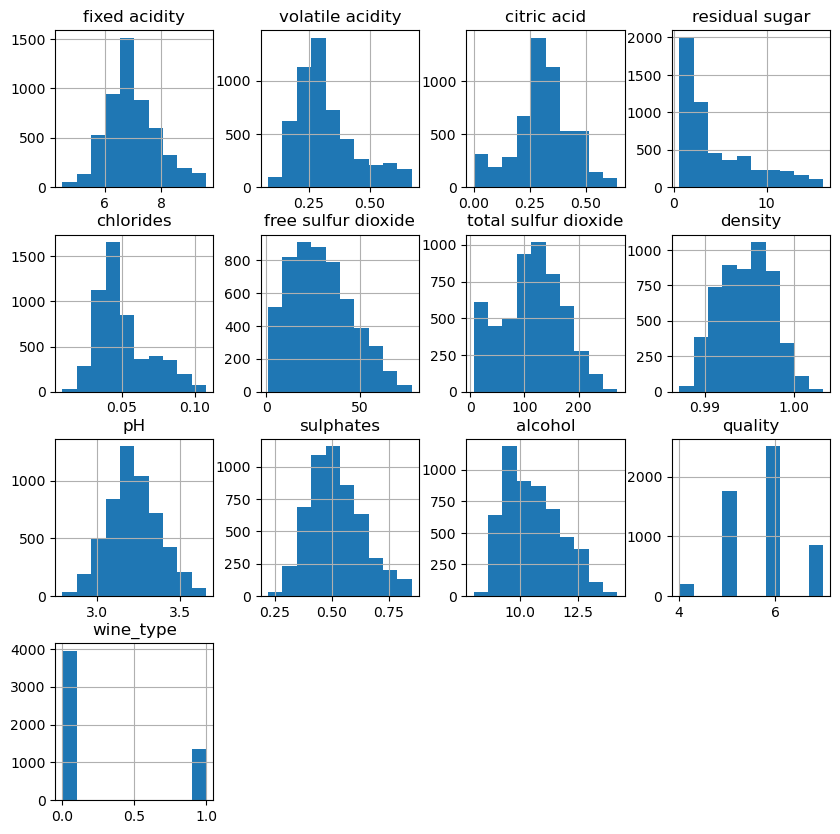

In [88]:
Combained.hist(figsize=(10,10))
plt.show()

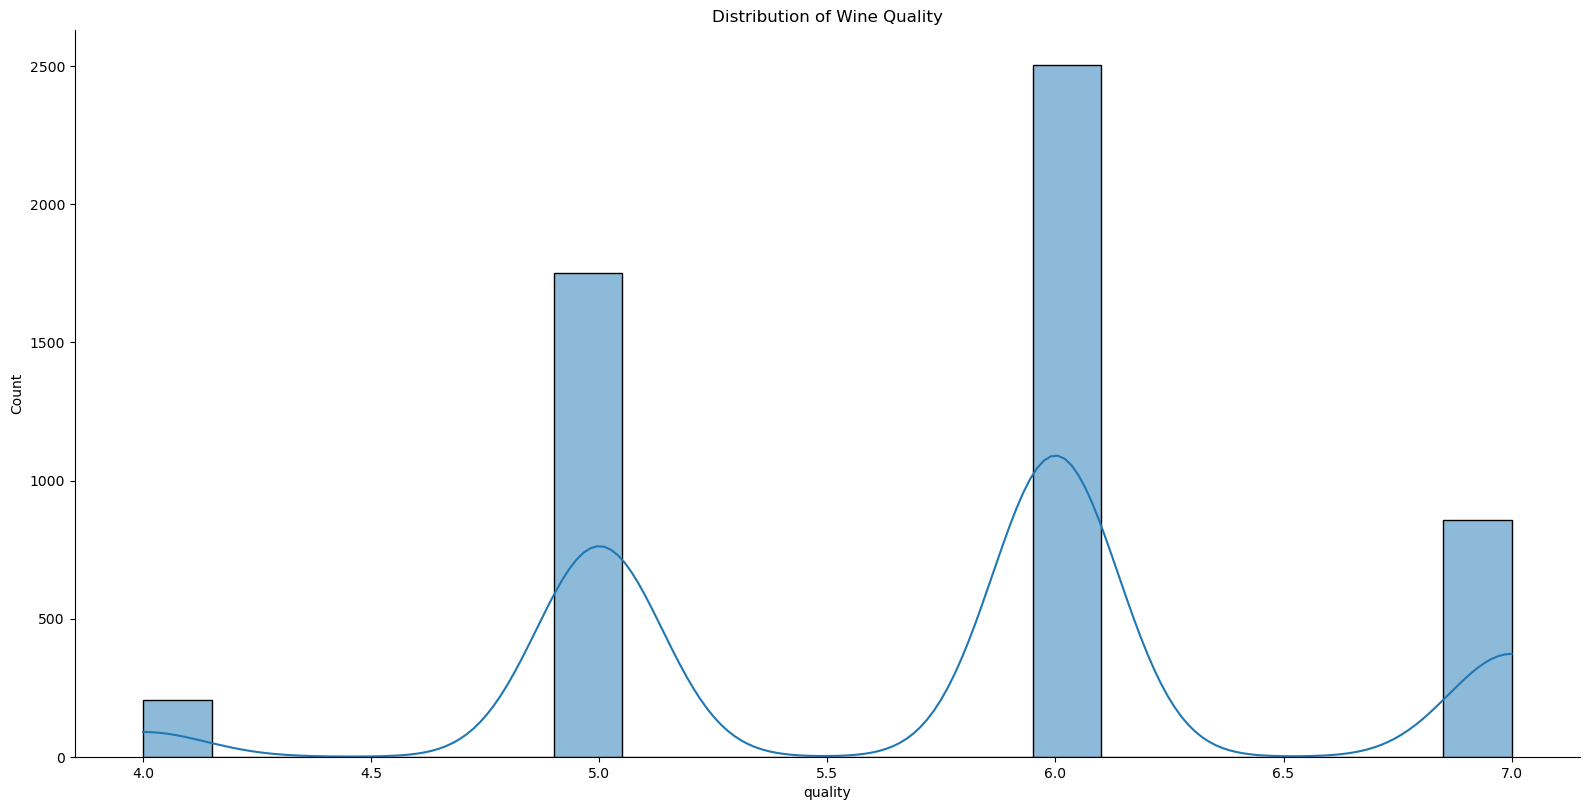

In [89]:
sns.displot(Combained['quality'],bins=20,kde=True,height=8,aspect=2)
plt.title('Distribution of Wine Quality')
plt.show()

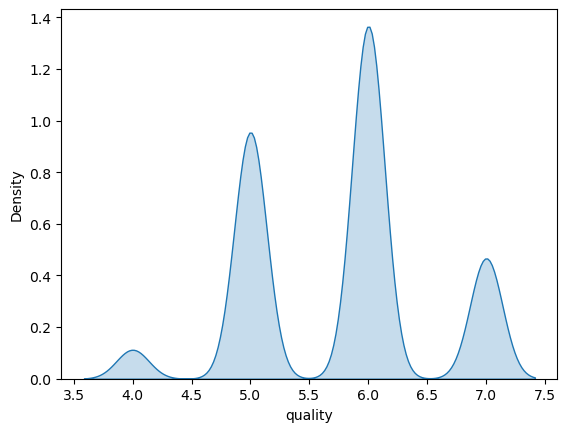

In [90]:
sns.kdeplot(data=Combained,x='quality',fill=True)
plt.show()

<Figure size 1800x800 with 0 Axes>

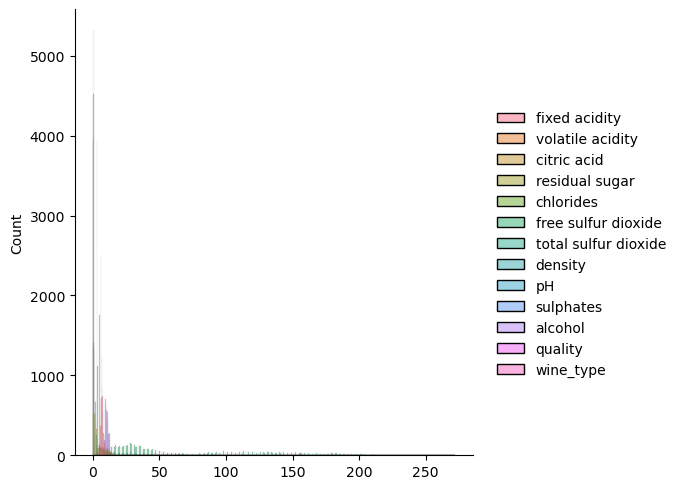

In [91]:
plt.figure(figsize=(18,8))
sns.displot(Combained)
plt.show()

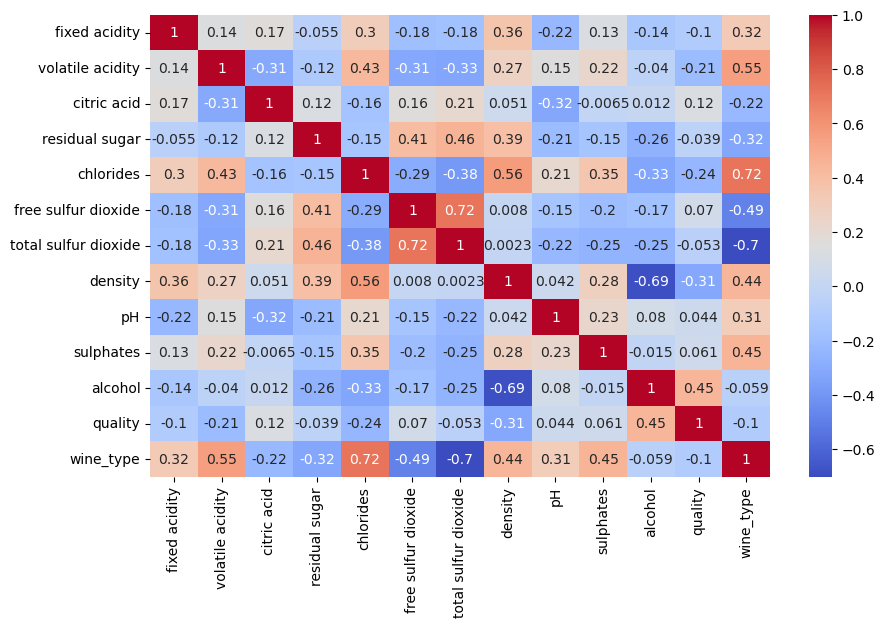

In [92]:
#Correlation
plt.figure(figsize=(10,6))
sns.heatmap(Combained.corr(),annot=True,cmap='coolwarm')
plt.show()

**Spliting Dataset For Training and testing**

In [94]:
label_encoder = LabelEncoder()
x=Combained.drop('quality',axis=1)
y=Combained['quality']

overloading Data

In [96]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)


print('x_smote:\n', x_smote)
print('y_smote:\n', y_smote)


x_smote:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
0           7.000000          0.270000     0.360000        2.700000   
1           6.300000          0.300000     0.340000        1.600000   
2           8.100000          0.280000     0.400000        6.900000   
3           7.200000          0.230000     0.320000        8.500000   
4           6.200000          0.320000     0.160000        7.000000   
...              ...               ...          ...             ...   
10019       7.948740          0.258641     0.362408        5.964851   
10020       7.000000          0.345855     0.560570        2.559328   
10021       7.417295          0.400000     0.288378        6.701077   
10022       7.149789          0.197595     0.296287        5.651477   
10023       6.801153          0.403731     0.442885        3.635195   

       chlorides  free sulfur dioxide  total sulfur dioxide   density  \
0       0.045000            45.000000            170.000000  1.0

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.2,random_state=42)

In [98]:
label=LabelEncoder()
y_train_encoded=label.fit_transform(y_train)
y_test_encoded=label.transform(y_test)

In [99]:
Rand_re=RandomForestClassifier()
Rand_re.fit(x_train,y_train_encoded)

RandomForestClassifier()

**Feature Selection**

In [101]:
#Using Random Forest Regressor Checking the Importance of Feature
importance=Rand_re.feature_importances_
features_importance=pd.DataFrame({'Features':x_train.columns,'Importance':importance})
features_importance=features_importance.sort_values(by='Importance',ascending=False)
print(features_importance)

                Features  Importance
10               alcohol    0.133717
5    free sulfur dioxide    0.111387
6   total sulfur dioxide    0.096552
7                density    0.096053
1       volatile acidity    0.087664
9              sulphates    0.083340
4              chlorides    0.082372
2            citric acid    0.076658
8                     pH    0.075474
3         residual sugar    0.073544
0          fixed acidity    0.066545
11             wine_type    0.016692


In [102]:
# Feature selecting
selected_features=features_importance[features_importance['Importance']>0.02]['Features']
print(selected_features)

10                 alcohol
5      free sulfur dioxide
6     total sulfur dioxide
7                  density
1         volatile acidity
9                sulphates
4                chlorides
2              citric acid
8                       pH
3           residual sugar
0            fixed acidity
Name: Features, dtype: object


In [103]:
selector=SelectFromModel(Rand_re,threshold=0.02)
selector.fit(x_train,y_train_encoded)

SelectFromModel(estimator=RandomForestClassifier(), threshold=0.02)

In [104]:
x_train_selected=selector.transform(x_train)
x_test_selected=selector.transform(x_test)

In [105]:
features=x_train.columns[selector.get_support()]
print(features)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [106]:
print(x_train_selected.shape)
print(x_test_selected.shape)

(8019, 11)
(2005, 11)


**Feature Scaling**

In [108]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train_selected)
x_test_scaled=scaler.transform(x_test_selected)

**Build the ML Model**

In [110]:
models={
    'Logistic Regression':LogisticRegression(),
    'Decision Tree Classifier':DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier':RandomForestClassifier(n_estimators=100,random_state=42),
    'Support Vector Classifier':SVC(random_state=42),
    'K-Nearest Neighbors Classifier':KNeighborsClassifier(),
    'Gradient Boosting Classifier':GradientBoostingClassifier(n_estimators=100,random_state=42)

}
result={}
prediction={}

**Model Evaluation**

In [112]:
for name,model in models.items():
  model.fit(x_train_scaled,y_train_encoded)
  y_pred=model.predict(x_test_scaled)
  prediction[name]=y_pred
  accuracy=accuracy_score(y_test_encoded,y_pred)
  precision=precision_score(y_test_encoded,y_pred,average='macro')
  recall=recall_score(y_test_encoded,y_pred,average='macro')
  f1=f1_score(y_test_encoded,y_pred,average='macro')
  result[name]={
      'accuracy':accuracy,
      'precision':precision,
      'recall':recall,
      'f1':f1
  }


In [113]:
result_df=pd.DataFrame(result)
result_df
print(result_df.T)

                                accuracy  precision    recall        f1
Logistic Regression             0.519701   0.506575  0.521706  0.509064
Decision Tree Classifier        0.624938   0.621829  0.626175  0.623831
Random Forest Classifier        0.744638   0.734789  0.746341  0.736738
Support Vector Classifier       0.626933   0.607751  0.629076  0.610408
K-Nearest Neighbors Classifier  0.669327   0.646196  0.671736  0.643239
Gradient Boosting Classifier    0.652369   0.646441  0.653711  0.648910


In [114]:
model_selection=result_df.T.sort_values(by=['accuracy','precision','recall','f1'],ascending=False)
model_selection

accuracy  precision    recall        f1
Random Forest Classifier        0.744638   0.734789  0.746341  0.736738
K-Nearest Neighbors Classifier  0.669327   0.646196  0.671736  0.643239
Gradient Boosting Classifier    0.652369   0.646441  0.653711  0.648910
Support Vector Classifier       0.626933   0.607751  0.629076  0.610408
Decision Tree Classifier        0.624938   0.621829  0.626175  0.623831
Logistic Regression             0.519701   0.506575  0.521706  0.509064

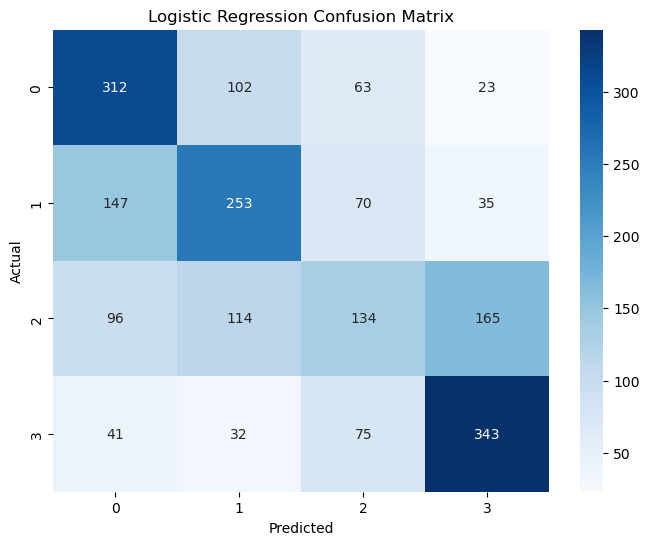

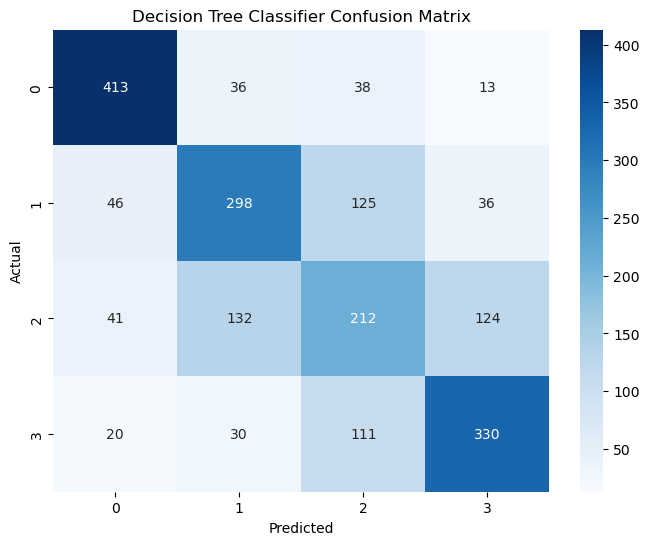

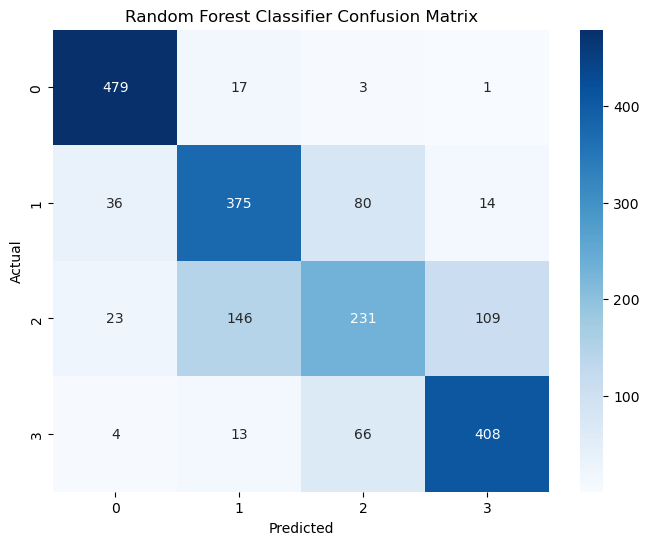

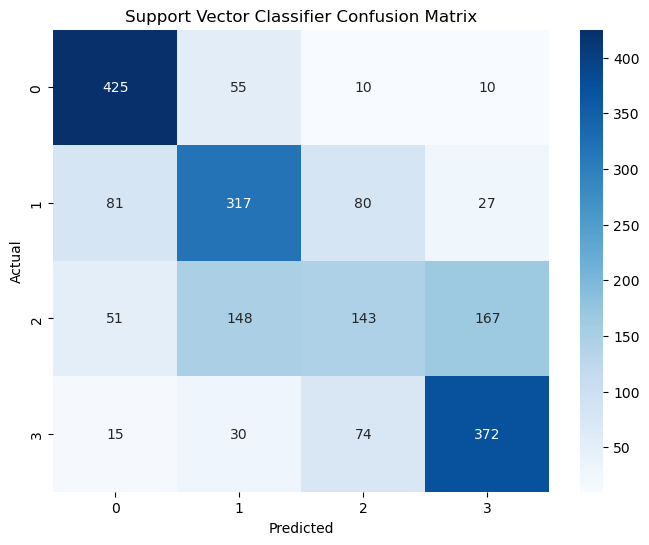

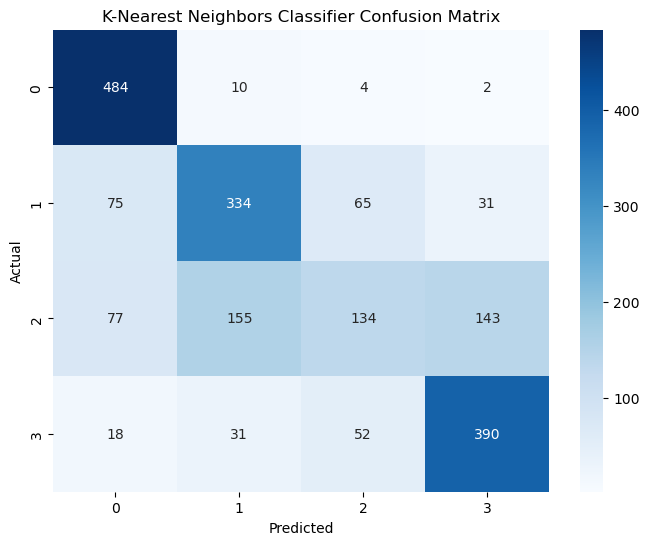

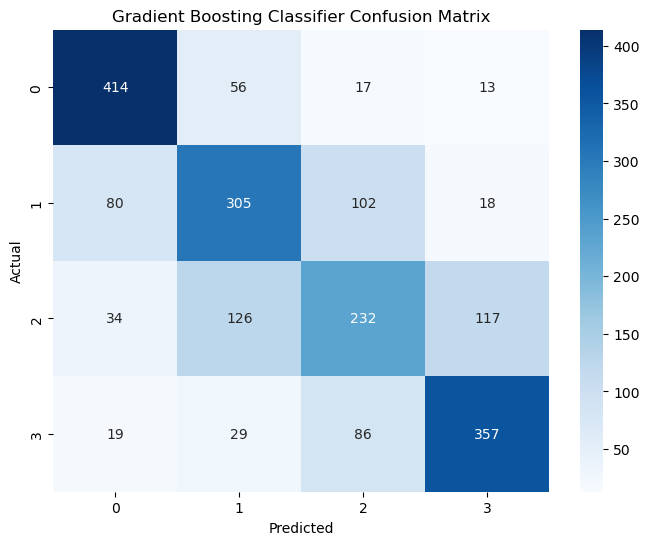

In [115]:
for model_name,y_pred in prediction.items():
  confusion=confusion_matrix(y_test_encoded,y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
  plt.title(f'{model_name} Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()


In [116]:
Best_model=max(result,key=lambda k:result[k]['f1'])
print(f"Best Model: {Best_model}")

Best Model: Random Forest Classifier


In [117]:
for model_name,y_pred in prediction.items():
  if model_name==best_model:
      confusion_matrix_df=pd.crosstab(y_test_encoded,y_pred,rownames=['Actual'],colnames=['Predicted'],margins=True)
      plt.figure(figsize=(8, 6))
      sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='Blues')
      plt.title(f'Confusion Matrix for {model_name}')
      plt.show()

NameError: name 'best_model' is not defined

In [ ]:
for model_name,y_pred in prediction.items():
  print(f"Classification Report for {model_name}:")
  print(classification_report(y_test_encoded, y_pred))
  print()

**Hyperparameter Tuning**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 10], 'n_estimators': [50, 100, 200]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)
best_model = grid_search.best_estimator_


In [ ]:
model_predictions = best_model.predict(x_test_scaled)
print(model_predictions)
accuracy=accuracy_score(y_test_encoded,model_predictions)
print(f"Accuracy: {accuracy}")

In [ ]:
best_params=grid_search.best_params_
best_params

**Saving Model**

In [ ]:
import joblib
joblib.dump(grid_search, 'Wine_Quality_Prediction_Model.pkl')
print("Model saved successfully.")

In [ ]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline([
    ('model',grid_search)
])

In [ ]:
pipeline.fit(x_train_selected, y_train_encoded)

**Testing Model with Unseen Data**

In [ ]:
files='Wine_Quality_Prediction_Pipeline.joblib'
joblib.dump(pipeline,files)


In [ ]:
data=Combained
data.head()

In [ ]:
unseen_datas=data.sample(n=10,random_state=42)
unseen_datas

Saving unseen data

In [ ]:
unseen_datas.to_csv('unseen_data.csv',index=False)

In [ ]:
unseen_datas=unseen_datas.drop('wine_type',axis=1)

In [ ]:
unseen_data_values=unseen_datas.drop('quality',axis=1)
unseen_data_target=unseen_datas['quality']

In [ ]:
smote = SMOTE()
smote = SMOTE(k_neighbors=2)
x_smote, y_smote = smote.fit_resample(unseen_data_values, unseen_data_target)

In [ ]:
label=LabelEncoder()
y_smote=label.fit_transform(y_smote)

In [ ]:
scaler=StandardScaler()
x_smote=scaler.fit_transform(x_smote)

In [ ]:
re=RandomForestClassifier(n_estimators=300,min_samples_split=5,min_samples_leaf=1,max_depth=None)
re.fit(x_smote,y_smote)
predictions=re.predict(x_smote)
accuracy=accuracy_score(y_smote,predictions)
print(f"Accuracy on unseen data: {accuracy}")
print(f"Predictions on unseen data: {predictions}")

In [ ]:
print(f"Classification Report:\n {classification_report(y_smote,predictions)}")

In [ ]:
loaded_pipeline=joblib.load('Wine_Quality_Prediction_Pipeline.joblib')

In [ ]:
prediction=loaded_pipeline.predict(x_smote)
accuracy=accuracy_score(y_smote,predictions)
print(f"Accuracy on unseen data: {accuracy}")
print(f"Predictions on unseen data: {predictions}")

In [ ]:
print(f"Classification Report:\n {classification_report(y_smote,predictions)}")

# **Conclusion**


This Model is to predict the Quality of Wine Based on the Chemical Properties of wine like PH, citric acid, free sulfur dioxide, fixed acidity, alcohol, etc.The performance of the Model Depends on the features selected and data preprocessing and the Algorithms choose. from the models that we tested, we got the best performance was from the random forest classifier, which has a higher degree of accuracy 74% From this model, the wine producers and stakeholders can make data driven decisions to improve the quality control and can make quality checking cost effective and get Customer satisfaction

# **Future Applications**

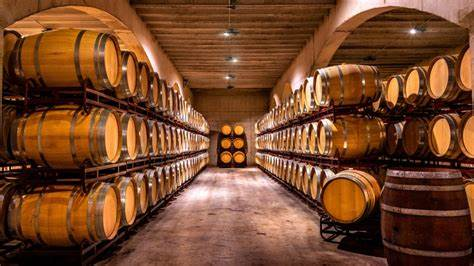

* Quality Control in Production: The model can be installed in wineries to
monitor quality in real-time during production and detect deviations promptly, thus assuring product uniformity.

* Cost: Automating the quality assessment may reduce the amount of manual sensory evaluation, labor cost, and subjective bias.

* Supply Chain Optimization: Quality predictions for wines will be useful in inventory management; products not meeting quality standards are avoided, hence better satisfaction among the customers.

* Personalized Recommendations: This model may be incorporated into applications of consumers so that the recommended wine may be tailored to predicted quality for improved user experience.

This will Help in ensuring the wine quality predictions meet set standards and regulation through the help of established benchmarks.